<a href="https://colab.research.google.com/github/thisismcgovern/pandas-diabetes-analysis/blob/main/day2_groupby_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Libraries and Instancing

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
uploded = files.upload()

Saving diabetes.csv to diabetes (1).csv


In [22]:
df = pd.read_csv('diabetes.csv')

## Grouping by Age bracket

In [24]:
bins = [0, 30, 40, 50, float('inf')]
labels = ['<30', '30-40', '40-50', '50+']


df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)


In [25]:
df.groupby('Age_Group').agg({
    "Pregnancies": "mean",
    "Glucose": "mean",
    "BMI": "mean",

})
#This gives a grouped information of the following



<ipython-input-25-bb86a8d963b3>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Age_Group').agg({


,Pregnancies,Glucose,BMI
Age_Group,,,
<30,1.921717,113.744949,31.390404
30-40,4.987879,125.309091,32.472121
40-50,7.050847,124.644068,34.617797
50+,6.033708,139.550562,30.302247


<ipython-input-10-3974b926eabc>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("Age_Group")["Glucose"].mean().plot(kind="bar")
<ipython-input-10-3974b926eabc>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("Age_Group")["Pregnancies"].mean().plot(kind="bar")
<ipython-input-10-3974b926eabc>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("Age_Group")["BMI"].mean().plot(kind="bar")


Text(0.5, 1.0, 'Average BMI by Age Group')

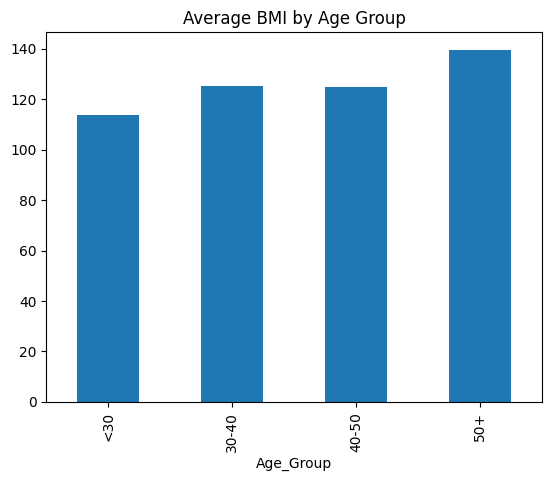

In [10]:
#Average Glucose per age group
df.groupby("Age_Group")["Glucose"].mean().plot(kind="bar")
plt.title("Average Glucose by Age Group")


<ipython-input-11-8bf7b857f123>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("Age_Group")["Pregnancies"].mean().plot(kind="bar")


Text(0.5, 1.0, 'Average Pregnancies by Age Group')

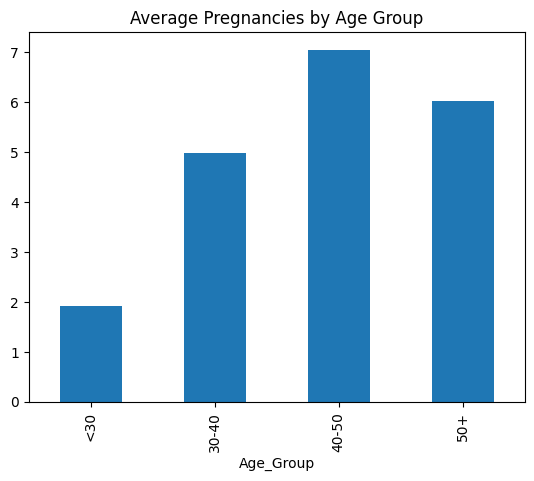

In [11]:
#Average Pregnancies
df.groupby("Age_Group")["Pregnancies"].mean().plot(kind="bar")
plt.title("Average Pregnancies by Age Group")

<ipython-input-12-eda570cf3562>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("Age_Group")["BMI"].mean().plot(kind="bar")


Text(0.5, 1.0, 'Average BMI by Age Group')

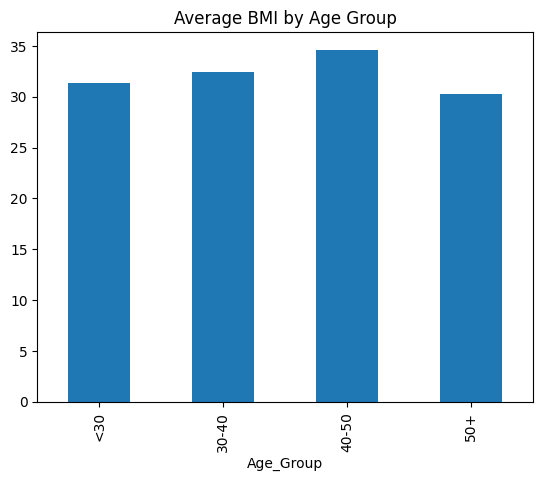

In [12]:
#Average BMI
df.groupby("Age_Group")["BMI"].mean().plot(kind="bar")
plt.title("Average BMI by Age Group")

### Outcome Analysis.

In [17]:
df.groupby('Outcome').agg({
    "Insulin" : "mean",
    "BloodPressure" : "mean",
    "BMI" : "median",

})


,Insulin,BloodPressure,BMI
Outcome,,,
0,68.792000,68.184000,30.05
1,100.335821,70.824627,34.25


### Risk Score By Age + Outcome

In [18]:
pivot = pd.pivot_table(df, values="Glucose", index="Age_Group", columns="Outcome", aggfunc="mean")


<ipython-input-18-69dd68178760>:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = pd.pivot_table(df, values="Glucose", index="Age_Group", columns="Outcome", aggfunc="mean")


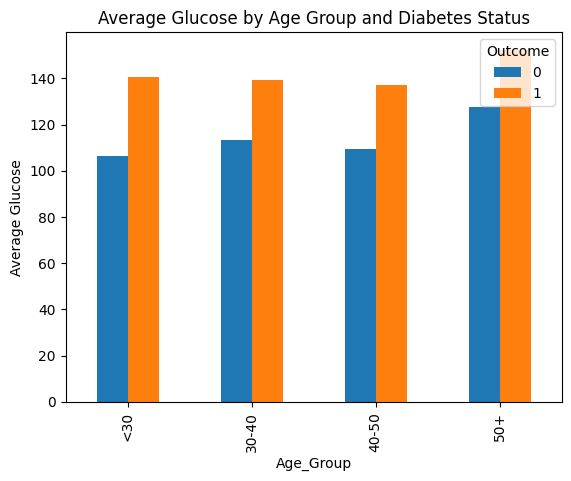

In [28]:
pivot.plot(kind="bar")
plt.title("Average Glucose by Age Group and Diabetes Status")
plt.ylabel("Average Glucose")
plt.show()

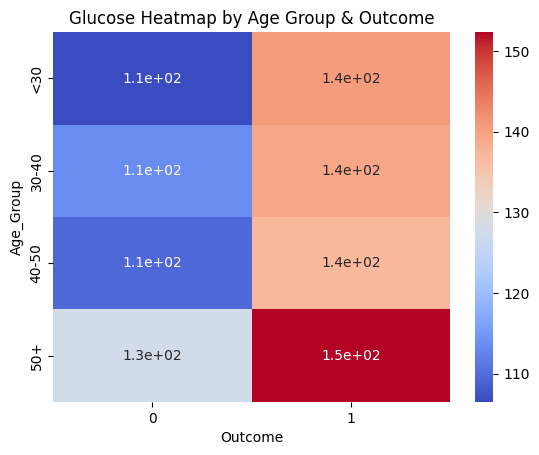

In [26]:

sns.heatmap(pivot, annot=True, cmap="coolwarm")
plt.title("Glucose Heatmap by Age Group & Outcome")
plt.show()

## Obesity Flag

In [30]:
def obesity_flag(row):
    if row['BMI'] > 30:
        return True
    else:
        return False

df['Obesity'] = df.apply(obesity_flag, axis=1)

In [31]:
df.groupby('Obesity').agg({
    "Insulin": "mean",
    "Glucose": "mean",
    "Age": "mean",

})

,Insulin,Glucose,Age
Obesity,,,
False,50.980198,112.930693,32.396040
True,98.578495,126.083871,33.791398


In [32]:
average_preg_by_age = df.groupby('Age_Group')['Pregnancies'].mean().sort_values(ascending=False)
print(average_preg_by_age)


Age_Group
40-50    7.050847
50+      6.033708
30-40    4.987879
<30      1.921717
Name: Pregnancies, dtype: float64


<ipython-input-32-02266d8e00d0>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_preg_by_age = df.groupby('Age_Group')['Pregnancies'].mean().sort_values(ascending=False)
